In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
# Loading training data set 
# MNIST is handwritten number data set examples
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

0it [00:00, ?it/s]

 99%|█████████▊| 9773056/9912422 [01:25<00:00, 331337.26it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:01<00:00, 37690.28it/s]
32768it [00:01, 23569.81it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



 51%|█████     | 835584/1648877 [00:11<00:09, 86437.79it/s]
9920512it [01:40, 331337.26it/s]                             A
 99%|█████████▉| 1638400/1648877 [00:20<00:00, 86714.89it/s]

0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 9738.42it/s]             

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!



1654784it [00:32, 86714.89it/s]                             

In [3]:
# Splitting the data set into training and test datasets
# Batch size: is the size of data needs to feed into nural network. 
# For example we have used 10, perhaps we can have loaded all of them
# this helps to genralize the model to avoid outfit

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
X, y = data[0][0], data[1][0]

In [6]:
print(data[1])

tensor([4, 6, 8, 9, 5, 8, 1, 6, 9, 7])


In [7]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [8]:
import matplotlib.pyplot as plt


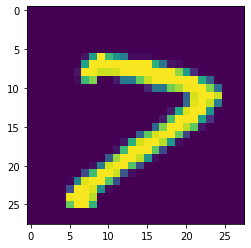

In [13]:
plt.imshow(data[0][-1].view(28,28))
plt.show()

### Balacing
If a model can find a shorter path to decrese in loss 

In [14]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%
